### Grid Search

Performs a grid search over the number of layers, size of the layers, learning rate and weight decay.

* Number of layers: 3, 5;
* Layer size: 1024, 2048;
* Learing rate: 1e-3, 5e-4 1e-4 5e-5;
* Weight decay: 1e-3, 1e-4, 1e-5.

(2x2x4x3 = 48)

Each model is trained over the same subset of the training set and evaluated over the same subset of the validation set. 

In [1]:
import train

from itertools import product

Error in cpuinfo: prctl(PR_SVE_GET_VL) failed


In [2]:
MAIN_DATASET_DIRECTORY = '../datasets/new/classificator/germline_all'

#NUMBER_OF_LAYERS = [3, 5]
#LAYER_SIZE = [1024, 2048]
#LEARNING_RATE = [1e-3, 5e-4, 1e-4, 5e-5]
WEIGHT_DECAY = [1e-3, 1e-4, 1e-5]

combinations = list(product(NUMBER_OF_LAYERS, LAYER_SIZE, LEARNING_RATE, WEIGHT_DECAY))

In [3]:
START = 10

In [ ]:
for i, (number_of_layers, layer_size, learning_rate, weight_decay) in enumerate(combinations[START:], START):
    parameters_dict = {
        'train_data_location': '{}/train/train.csv'.format(MAIN_DATASET_DIRECTORY),
        'val_data_location': '{}/val/val.csv'.format(MAIN_DATASET_DIRECTORY),
        'subsample': None,
        'frac': 0.05,
        'shuffle': True,
        'batch_size': 32,

        'model_name': 'average',
        'model_checkpoint': 'Exscientia/IgBert',
        'tokenizer_checkpoint': None,
        'number_of_layers': number_of_layers,
        'layer_size':layer_size,

        'optimizer_name': 'adam',
        'lr': learning_rate,
        'momentum': 0,
        'weight_decay': weight_decay,

        'n_epochs': 1,
        'train_batches': 3000,
        'eval_batches': 10,

        'evaluate_every': 20,
        'mean_lasts': 5,
    
        'save': True,
        'name': 'grid_search_1/{}'.format(i)
    }
    train.train(**parameters_dict)

Retrieving the datasets...
Reading ../datasets/new/classificator/germline_all/train/train.csv...
Dataset of size 1432650
Sampled a subset of size 71632
Reading ../datasets/new/classificator/germline_all/val/val.csv...
Dataset of size 542466
Sampled a subset of size 27123
Retrieve the model...
Retrieve the tokenizer...
Tokenizer checkpoint: Exscientia/IgBert
Retrieve the optimizer...
Start training...
Number of batches: 2239 train, 848 val.
Number of epochs: 1
Total number of batches that will be used during training: 2239
Number of batches for a single evaluation: 10
Results are reported every 20 batches
Model: ClassificationFromAveraging
Device detected: cuda
 It.  |               TRAIN               |               EVAL                |
------|-----------------------------------|-----------------------------------|
      |      loss       |    accuracy     |      loss       |    accuracy     |
------|-----------------|-----------------|-----------------|-----------------|
    1 | 0.6

### Train

In [1]:
import train

Error in cpuinfo: prctl(PR_SVE_GET_VL) failed


In [2]:
parameters_dict = {
    'train_data_location': '../datasets/new/classificator/train/train.csv',
    'val_data_location': '../datasets/new/classificator/val/val.csv',
    'subsample': None,
    'frac': 0.05,
    'shuffle': True,
    'seed': 54321,
    'batch_size': 32,

    'model_name': 'average',
    'model_checkpoint': 'Exscientia/IgBert',
    'tokenizer_checkpoint': None,
    'number_of_layers': 5,
    'layer_size':2048,

    'optimizer_name': 'adam',
    'lr': 1e-4,
    'momentum': 0,
    'weight_decay': 1e-3,
    'beta1': 0.9
    'beta2': 0.999

    #'lr_scheduler_name': 'plateau',
    #'factor': 0.9,
    #'min_lr': 1e-6,
    #'patience': 10,

    #'lr_scheduler_name': 'exponential',
    #'lr_update_every': 5,
    #'gamma': 0.9,

    'n_epochs': 1,
    'train_batches': 3000,
    'eval_batches': 10,

    'evaluate_every': 20,
    'mean_lasts': 5,
    
    'save': True,
    'name': 'grid_search_capacity/3_2048'
}

COMPUTE_NEW = True

In [3]:
if COMPUTE_NEW: train.train(**parameters_dict)

Retrieving the datasets...
Reading ../datasets/new/classificator/train/train.csv...
Dataset of size 1432650
Sampled a subset of size 71632
Reading ../datasets/new/classificator/val/val.csv...
Dataset of size 542466
Sampled a subset of size 27123
Retrieve the model...
Retrieve the tokenizer...
Tokenizer checkpoint: Exscientia/IgBert
Retrieve the optimizer...
Start training...
Number of batches: 2239 train, 848 val.
Number of epochs: 1
Total number of batches that will be used during training: 3000
Number of batches for a single evaluation: 10
Results are reported every 20 batches
Model: ClassificationFromAveraging
Device detected: cuda
 It.  |               TRAIN               |               EVAL                |
------|-----------------------------------|-----------------------------------|
      |      loss       |    accuracy     |      loss       |    accuracy     |
------|-----------------|-----------------|-----------------|-----------------|


KeyboardInterrupt: 

### Evaluate

In [1]:
import evaluate

Error in cpuinfo: prctl(PR_SVE_GET_VL) failed


In [2]:
MAIN_DATASET_DIRECTORY = '../datasets/new/classificator/germline_all'

In [11]:
parameters_dict = {
    'name': 'grid_search_1/4',
    
    'val_data': '{}/val/val.csv'.format(MAIN_DATASET_DIRECTORY),
    'subsample': None,
    'frac': 0.05,
    'shuffle': True,
    'batch_size': 32,
    'seed': 0,
    'eval_batches': None,

    'model_name': 'average',
    'model_checkpoint': 'Exscientia/IgBert',
    'tokenizer_checkpoint': None,
    
    'save': True,
    'out': 'val_results'
}

COMPUTE_NEW = True

In [12]:
import importlib

if COMPUTE_NEW:
    importlib.reload(evaluate)
    evaluate.evaluate(**parameters_dict)

Location: ../results/classification/grid_search_1/4/
Retrieving the dataset...
Reading ../datasets/new/classificator/germline_all/val/val.csv...
Dataset of size 542466
Sampled a subset of size 27123
Load the model...
Retrieve the tokenizer...
Tokenizer checkpoint: Exscientia/IgBert
Start evaluating...
Number of batches: 848.
Select only the first 848 batches
Model: ClassificationFromAveraging
Device detected: cuda


100%|█████████████████████████████████████████| 848/848 [06:15<00:00,  2.26it/s]


### Check correlation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
import torch
from tqdm import tqdm

from scipy.stats import zscore
from scipy.special import softmax
from torch.utils.data import DataLoader
from collections import defaultdict
#from torch.nn.functional import softmax

Error in cpuinfo: prctl(PR_SVE_GET_VL) failed


In [2]:
DIR = '../../datasets/FLAb/data/'

In [3]:
dfs = {}

for d in os.listdir(DIR):
    if '.md' in d: continue
    files = [f for f in os.listdir('{}/{}'.format(DIR, d)) if 'csv' in f]
    df = pd.concat([pd.read_csv('{}/{}/{}'.format(DIR, d, f)) for f in files]).reset_index(drop=True)
    pair_id = list(range(len(df)))
    df['pair_id'] = pair_id
    df = df.rename({'fitness': 'class'}, axis=1)
    df = df.iloc[:300, :]
    dfs[d] = df

del dfs['cst']
del dfs['wittrup']

In [4]:
for x in dfs.items():
    print(x[0], x[1].columns)

aggregation Index(['heavy', 'light', 'class', 'pair_id'], dtype='object')
binding Index(['heavy', 'light', 'class', 'Unnamed: 0', 'pair_id'], dtype='object')
expression Index(['heavy', 'light', 'class', 'pair_id'], dtype='object')
immunogenicity Index(['heavy', 'light', 'class', 'pair_id'], dtype='object')
polyreactivity Index(['heavy', 'light', 'class', 'pair_id'], dtype='object')
tm Index(['heavy', 'light', 'class', 'pair_id'], dtype='object')


In [5]:
WHICH_MODEL = 'final_train_1'
LOCATION = '../results/classification/{}'.format(WHICH_MODEL)

CHECKPOINT = 'Exscientia/IgBert'
MODEL_NAME = 'average'

TOKENIZER_CHECKPOINT = None
if TOKENIZER_CHECKPOINT is None: TOKENIZER_CHECKPOINT = CHECKPOINT

In [6]:
state_dict = torch.load('{}/model.pt'.format(LOCATION), weights_only=True)
model = utils.load_model(MODEL_NAME, checkpoint=CHECKPOINT, state_dict=state_dict)
tokenizer = utils.retrieve_tokenizer(TOKENIZER_CHECKPOINT)
data_list = [DataLoader(utils.AbDataset(df), batch_size=32) for _, df in dfs.items()] 

Tokenizer checkpoint: Exscientia/IgBert


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [8]:
logits_dict = defaultdict(list)

for (name, _), data in zip(dfs.items(), data_list):
    print(name)
    model.eval()
    with torch.no_grad():
        for batch in tqdm(data, total=len(data)):
            _, inputs, value = batch[0], batch[1], batch[2]
            input_dict = utils.tokenize_inputs(inputs, tokenizer, device=device)
            logits = model(**input_dict)
            logits_dict[name].append(logits.to('cpu'))
    

aggregation


100%|███████████████████████████████████████████| 10/10 [00:11<00:00,  1.11s/it]


binding


100%|███████████████████████████████████████████| 10/10 [00:10<00:00,  1.02s/it]


expression


100%|███████████████████████████████████████████| 10/10 [00:10<00:00,  1.01s/it]


immunogenicity


100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.11s/it]


polyreactivity


100%|███████████████████████████████████████████| 10/10 [00:10<00:00,  1.04s/it]


tm


100%|█████████████████████████████████████████████| 7/7 [00:06<00:00,  1.00it/s]


In [21]:
prob_dict = {}

for name, logits_list in logits_dict.items():
    logits = np.concat(logits_list)
    probabilities = softmax(logits, axis=1)
    prob_dict[name] = probabilities[:, 0]

In [22]:
scores_dict = {}

not_log = ['aggregation', 'immunogenicity']

for name, df in dfs.items():
    scores = df['class'].to_numpy()
    if name not in not_log:
        scores = np.log10(scores)
    scores = zscore(scores)
    scores_dict[name] = scores

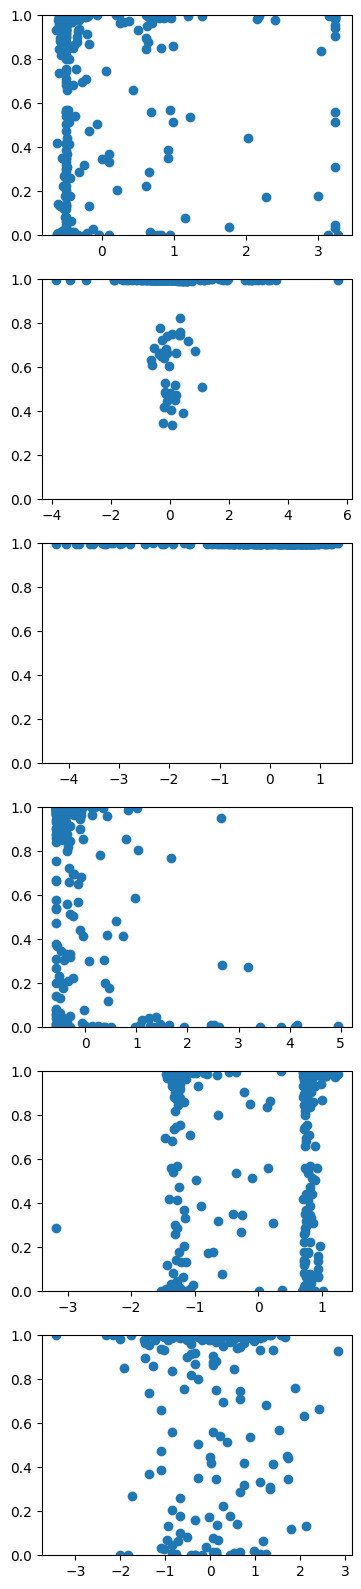

In [26]:
fig, axs = plt.subplots(6)

fig.set_size_inches(4, 20)

for i, ((_, score), (_, prob)) in enumerate(zip(scores_dict.items(), prob_dict.items())):
    axs[i].scatter(score, prob)
    axs[i].set_ylim(0, 1)

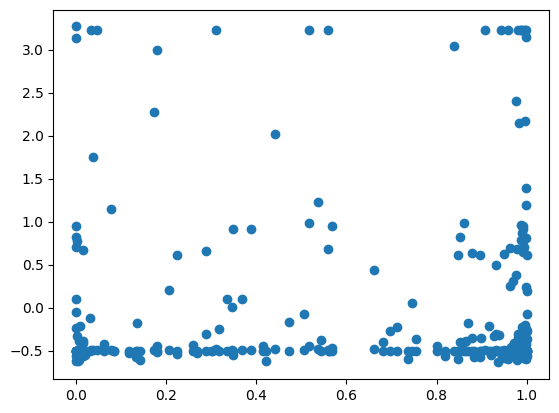

In [84]:
plt.scatter(probabilities[:, 0], scores)

### Evalute pair

In [1]:
import torch
import pandas as pd

import utils

from torch.utils.data import DataLoader

Error in cpuinfo: prctl(PR_SVE_GET_VL) failed


In [2]:
test_data = '../datasets/new/test/test.csv'

df = pd.read_csv(test_data, index_col=0)

df

,pair_id,heavy_id,heavy,light_id_pos,light_pos,light_id_neg,light_neg
0,605842,604074,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...,3608,SYVLTQPPSVSVAPGKTARITCGGNNIGSKSVHWYQQKPGQAPVLV...,338246,DIQMTQSPSSLSASVGDRVTITCRASQSISNYLNWYQQKPEKVPKL...
1,1588716,1570796,QVQLVQSGAEVKTPEASVKLSCKTSGYTFTSYYIHWVRQAPGQGLE...,201867,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...,581364,DIQMTQSPSTLSASVGDRVTITCRASQSFSRWLAWYQQKPGKAPKL...
2,934058,931467,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYWMSWVRQAPGKGLE...,723,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,545684,SYVLTQPPSVSVAPGQTATITCGGNNIGSKVVHWYQQRPGQAPILV...
3,1047359,1044321,EVQLVESGGGLVKPGGSLRLSCAASGFTFSNAWMSWVRQAPGKGLE...,327738,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,28102,QPVLTQPPSASASLGASVTLTCTLSSGYSNYKVDWYQQRPGKGPRF...
4,761110,758895,QVQLVQSGDEVREPGASVKVSCKASGDTLSSHGVTWVRQAPGQRLE...,268698,DVQMTQSPSTLSASVGDRVTITCRASQSISRSLAWYQQHPGRVPKL...,302895,QSVLTQPPSVSGAPGQTVTISCTGSSSNIGAGYDVHWYQQLPGTAP...
...,...,...,...,...,...,...,...
369592,1350039,1340727,QVQLVQSGTEVKKPGASVTVSCKAAGYTFANYGVSWVRQAPGQGLE...,526148,DVVMTQSPLSLPVILGQPASISCRSPQSLEYVDGNTYLTWFQQRPG...,463742,QSVLTQPPSASGTPGQRVTISCSGSSSNIGGNSVNWYQHLPGTAPK...
369593,99455,98898,EVQLVESGGGLVQPGGSLKLSCAASGFTFSGSAIHWVRQASGKGLE...,74920,DIVMTQSPLSLPVTPGEPASISCRSSQSLLHGNGYNYLHWYLQKPG...,336068,QLVLTQSPSASASLGASVKLTCTLSSGHSSYVIAWHQQQPEKGPRF...
369594,1532205,1514454,QVQLVESGGGVVQPGESLRLSCAASGFTFARYGFHWVRQAPGKGLE...,655174,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNIYLSWFHQRPG...,205064,QSALTQPASVSGSPGQSITISCTGTSSDVGSYNLVSWYQQHPGKAP...
369595,789233,786881,EVQLVESGGGLVKPGGSLRLSCAASGFTFSNAWMSWVRQAPGKGLE...,83,DIVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...,9062,QSALTQPASVSGSPGQSITISCTGTSSDVGGYNYVSWYQQHPGKAP...


In [3]:
import importlib

In [4]:
importlib.reload(utils)


def evaluate(name,
             test_data, subsample, batch_size,
             model_name, model_checkpoint, tokenizer_checkpoint, eval_batches):

    location = r'../results/classification/{}/'.format(name)
    print('Location: {}'.format(location))
    
    # Get the data
    print('Retrieving the dataset...')
    test_ds, hyperpar = utils.get_test_dataset(test_data, subsample=subsample)
    test_dl = DataLoader(test_ds, batch_size=batch_size)

    # Load the model
    print('Load the model...')
    state_dict = torch.load('{}/model.pt'.format(location), weights_only=True)
    model = utils.load_model(model_name, checkpoint=model_checkpoint, state_dict=state_dict)

    # Get the tokenizer
    print('Retrieve the tokenizer...')
    if tokenizer_checkpoint is None: tokenizer_checkpoint = model_checkpoint
    tokenizer = utils.retrieve_tokenizer(tokenizer_checkpoint)

    logits = utils.evaluate_test(model, test_dl, metrics=None, eval_batches=None,
                                 tokenizer=tokenizer)

    logits.to_csv('{}/logits_val.csv'.format(location))

x = evaluate('IgBert_only_v/long_training', 
             test_data, None, 32,
             'average', 'Exscientia/IgBert', None, 10000)

Location: ../results/classification/IgBert_only_v/long_training/
Retrieving the dataset...
Reading ../datasets/new/test/test.csv...
Dataset of size 369597
Load the model...
Retrieve the tokenizer...
Tokenizer checkpoint: Exscientia/IgBert
Start evaluating...
Number of batches: 11550.
Select only the first 11550 batches
Model: ClassificationFromAveraging
Device detected: cuda


100%|███████████████████████████████████| 11550/11550 [2:41:14<00:00,  1.19it/s]


In [7]:
x = [[1, 2], [3, 4], [5, 6]]

sum(x, [])

[1, 2, 3, 4, 5, 6]

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

Error in cpuinfo: prctl(PR_SVE_GET_VL) failed


In [41]:
model = nn.Linear(10, 10)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

sched = optim.lr_scheduler.LinearLR(optimizer,
                       start_factor=1, end_factor=0.1, total_iters=30)

for _ in range(60):
    print(sched.get_last_lr())
    sched.step()

[0.0001]
[9.7e-05]
[9.4e-05]
[9.099999999999999e-05]
[8.799999999999998e-05]
[8.499999999999999e-05]
[8.199999999999999e-05]
[7.899999999999998e-05]
[7.599999999999999e-05]
[7.299999999999999e-05]
[6.999999999999998e-05]
[6.699999999999999e-05]
[6.399999999999998e-05]
[6.0999999999999985e-05]
[5.799999999999998e-05]
[5.499999999999998e-05]
[5.199999999999998e-05]
[4.8999999999999985e-05]
[4.5999999999999986e-05]
[4.299999999999999e-05]
[3.999999999999999e-05]
[3.699999999999999e-05]
[3.399999999999999e-05]
[3.0999999999999995e-05]
[2.7999999999999993e-05]
[2.499999999999999e-05]
[2.1999999999999993e-05]
[1.899999999999999e-05]
[1.5999999999999992e-05]
[1.2999999999999994e-05]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.999999999999994e-06]
[9.

In [30]:
model = nn.Linear(10, 10)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

sched = optim.lr_scheduler.ConstantLR(optimizer,
                       factor=0.9, total_iters=30)

for _ in range(40):
    print(sched.get_last_lr())
    sched.step()

[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[9e-05]
[0.0001]
[0.0001]
[0.0001]
[0.0001]
[0.0001]
[0.0001]
[0.0001]
[0.0001]
[0.0001]
[0.0001]


In [31]:
model = nn.Linear(10, 10)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

sched = optim.lr_scheduler.ExponentialLR(optimizer,
                       gamma=0.9)

for _ in range(40):
    print(sched.get_last_lr())
    sched.step()

[0.0001]
[9e-05]
[8.1e-05]
[7.290000000000001e-05]
[6.561000000000002e-05]
[5.904900000000002e-05]
[5.314410000000002e-05]
[4.782969000000002e-05]
[4.304672100000002e-05]
[3.874204890000002e-05]
[3.4867844010000016e-05]
[3.138105960900002e-05]
[2.8242953648100018e-05]
[2.5418658283290016e-05]
[2.2876792454961016e-05]
[2.0589113209464913e-05]
[1.8530201888518422e-05]
[1.667718169966658e-05]
[1.5009463529699922e-05]
[1.350851717672993e-05]
[1.2157665459056937e-05]
[1.0941898913151244e-05]
[9.84770902183612e-06]
[8.862938119652508e-06]
[7.976644307687257e-06]
[7.1789798769185315e-06]
[6.461081889226678e-06]
[5.81497370030401e-06]
[5.23347633027361e-06]
[4.710128697246249e-06]
[4.239115827521624e-06]
[3.815204244769462e-06]
[3.4336838202925156e-06]
[3.090315438263264e-06]
[2.7812838944369375e-06]
[2.503155504993244e-06]
[2.2528399544939195e-06]
[2.0275559590445276e-06]
[1.824800363140075e-06]
[1.6423203268260674e-06]


In [39]:
model = nn.Linear(10, 10)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

sched = optim.lr_scheduler.SequentialLR(optimizer,
                                        [optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9),
                                         optim.lr_scheduler.ConstantLR(optimizer, 1, 1)],
                                        [15])

for _ in range(40):
    print(sched.get_last_lr())
    print(optimizer.state_dict()['param_groups'][0]['lr'])
    sched.step()

[0.0001]
0.0001
[9e-05]
9e-05
[8.1e-05]
8.1e-05
[7.290000000000001e-05]
7.290000000000001e-05
[6.561000000000002e-05]
6.561000000000002e-05
[5.904900000000002e-05]
5.904900000000002e-05
[5.314410000000002e-05]
5.314410000000002e-05
[4.782969000000002e-05]
4.782969000000002e-05
[4.304672100000002e-05]
4.304672100000002e-05
[3.874204890000002e-05]
3.874204890000002e-05
[3.4867844010000016e-05]
3.4867844010000016e-05
[3.138105960900002e-05]
3.138105960900002e-05
[2.8242953648100018e-05]
2.8242953648100018e-05
[2.5418658283290016e-05]
2.5418658283290016e-05
[2.2876792454961016e-05]
2.2876792454961016e-05
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]
0.0001
[0.0001]